$\textbf{*** This version uses the }\texttt{Dataloader, Asset, Portfolio}\textbf{ classes to load data}$

In [239]:
import sys
import importlib
sys.path.append('../')

from IPython.display import display, Math, Latex

# From data_preparation classes
from src.finance_ml.data_preparation.data_preparation import DataLoader

from src.finance_ml.indicators.indicators import Indicators

import pandas as pd 
import matplotlib.pyplot as plt 

In [240]:
# Import required packages
import pandas as pd
import numpy as np

## Reading the Data File

In [241]:
# Defining time_index_col (must be the same column in all inputs) and keep_cols refering to the columns that will remain in the dataset
dataloader = DataLoader(time_index_col= 'DATE', 
                    keep_cols = ['VOLUME','OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW','TRANSACTIONS'])

Here we will select $N=10,000$ ticks from our database for simplicity. We also select the equity $\textbf{USDBRL}$ from  the data available.

In [242]:
# Example Files
fname_RUBEUR = 'FX/RUBEUR_2020-04-07_2022-04-06.parquet'
fname_USDBRL = 'FX/USDBRL_2020-04-07_2022-04-06.parquet'
fname_AAPL = 'equities/AAPL_2020-04-07_2022-04-06.parquet'

# No. of Records from example dataset
N = 50

In [243]:
# Dataset chosen in this simulation
ticker = 'Apple'
fname = fname_AAPL

In [244]:
# loading assets into to an unique df
df = dataloader.load_dataset({ticker:'../data/'+fname}).iloc[:N]
# display(df)
df

,Apple_VOLUME,Apple_OPEN,Apple_HIGHT,Apple_LOW,Apple_CLOSE,Apple_VW,Apple_TRANSACTIONS
DATE,,,,,,,
2020-04-07 12:17:00,14256.0,67.3500,67.3625,67.3275,67.3375,67.3454,45
2020-04-07 12:18:00,16552.0,67.3501,67.3625,67.3250,67.3250,67.3407,57
2020-04-07 12:19:00,80172.0,67.3250,67.4475,67.3250,67.4225,67.3937,149
2020-04-07 12:20:00,183740.0,67.4475,67.4700,67.3125,67.3700,67.3671,159
2020-04-07 12:21:00,35372.0,67.3500,67.3850,67.2975,67.2975,67.3469,102
2020-04-07 12:22:00,7228.0,67.3425,67.3575,67.2950,67.3350,67.3125,33
2020-04-07 12:23:00,8692.0,67.3575,67.3725,67.3375,67.3500,67.3552,36
2020-04-07 12:24:00,18900.0,67.4125,67.4125,67.3500,67.3750,67.3711,58
2020-04-07 12:25:00,10352.0,67.3975,67.4150,67.3750,67.4150,67.3968,48


In [245]:
data_cols = ['OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW', 'VOLUME','ADI','TRANSACTIONS']

# Columns of indicators with default parameters
var_cols = ['CLOSE_returns',
       'CLOSE_log_returns', 'CLOSE_price_change',
       'CLOSE_pct_change', 'RA_5', 'RA_10', 'AMPL',
       'OPNCLS', 'MA_5', 'MA_10', 'V_MA_5', 'V_MA_10',
       'V_MA_20', 'KAMA_w10p(02,30)', 'PPO_w(26,12)',
       'PVO_w(26,12)s09', 'PVOH_w(26,12)s09',
       'PVOsgn_w(26,12)s09', 'ROC_w12', 'RSI_w14',
       'StRSI_w14s(03,03)', 'StRSId_w14s(03,03)',
       'StRSIk_w14s(03,03)', 'SO_w14s03', 'SOsgn_w14s03',
       'AOI_w(05,34)', 'TSI_w(25,13)',
       'UO_wi(07,14,28)wg(4.0,2.0,1.0)', 'WRI_14', 'ADI',
       'CMF_w20', 'EOM_w14', 'EMV_w14', 'FI_w13',
       'MFI_w14', 'NVI', 'OBV', 'VPT', 'VWAP_w14',
       'ADXP_w14', 'ADXN_w14', 'AROOND_w25', 'AROON_w25',
       'AROONU_w25', 'CCI_w20', 'DPO_w20', 'EMA_w14','SMA_w14',
       'ICHIA_w(09,26,52)', 'ICHIB_w(09,26,52)',
       'ICHIBL_w(09,26,52)', 'ICHICL_w(09,26,52)',
       'KST_r(10,15,20,30)_w(10,10,10,15)',
       'KSTD_r(10,15,20,30)_w(10,10,10,15)',
       'KSTS_r(10,15,20,30)_w(10,10,10,15)', 'MACD_w(26,12,09)',
       'MACDD_w(26,12,09)', 'MACDS_w(26,12,09)', 'MI_w(09,25)',
       'PSAR_s(0.02,0.2)', 'PSARD_s(0.02,0.2)',
       'PSARDI_s(0.02,0.2)', 'PSARU_s(0.02,0.2)',
       'PSARUI_s(0.02,0.2)', 'STC_w(50,23)c10s(03,03)',
       'TRIX_w15', 'VI_w14', 'VIN_w14', 'VIP_w14',
       'WMA_w09']

# For each of calculated column, we add the ticker code, as standardized by class 𝙳𝚊𝚝𝚊𝙻𝚘𝚊𝚍𝚎𝚛
data_cols = [ticker+'_'+col for col in data_cols]
norm_cols = [col + '_norm' for col in data_cols]
data_cols

['Apple_OPEN',
 'Apple_HIGHT',
 'Apple_LOW',
 'Apple_CLOSE',
 'Apple_VW',
 'Apple_VOLUME',
 'Apple_ADI',
 'Apple_TRANSACTIONS']

# Indicators

## Calculate Indicators

In [246]:
# Process data normalization
norm_data = True

# Select Indicator transformer
ind_processor = Indicators(ticker = ticker, norm_data = True,calc_all=False,list_ind=['ADI'])

# Calculate Indicators over input dataframe
df = ind_processor.fit_transform(df)

if (norm_data):
    df_norm = ind_processor.data_norm

In [247]:
# Display dataframe with Indicators
# display(df[])
display(df[data_cols].dropna(axis=0))

,Apple_OPEN,Apple_HIGHT,Apple_LOW,Apple_CLOSE,Apple_VW,Apple_VOLUME,Apple_ADI,Apple_TRANSACTIONS
DATE,,,,,,,,
2020-04-07 12:17:00,67.3500,67.3625,67.3275,67.3375,67.3454,14256.0,-6109.714286,45
2020-04-07 12:18:00,67.3501,67.3625,67.3250,67.3250,67.3407,16552.0,-22661.714286,57
2020-04-07 12:19:00,67.3250,67.4475,67.3250,67.4225,67.3937,80172.0,24787.020408,149
2020-04-07 12:20:00,67.4475,67.4700,67.3125,67.3700,67.3671,183740.0,-24793.614512,159
2020-04-07 12:21:00,67.3500,67.3850,67.2975,67.2975,67.3469,35372.0,-60165.614512,102
2020-04-07 12:22:00,67.3425,67.3575,67.2950,67.3350,67.3125,7228.0,-58141.774512,33
2020-04-07 12:23:00,67.3575,67.3725,67.3375,67.3500,67.3552,8692.0,-60625.203084,36
2020-04-07 12:24:00,67.4125,67.4125,67.3500,67.3750,67.3711,18900.0,-64405.203084,58
2020-04-07 12:25:00,67.3975,67.4150,67.3750,67.4150,67.3968,10352.0,-54053.203084,48


In [248]:
# Display dataframe with Indicators of normalized data
if (norm_data):
    display(df_norm[norm_cols].dropna(axis=0))


,Apple_OPEN_norm,Apple_HIGHT_norm,Apple_LOW_norm,Apple_CLOSE_norm,Apple_VW_norm,Apple_VOLUME_norm,Apple_ADI_norm,Apple_TRANSACTIONS_norm
DATE,,,,,,,,
2020-04-07 12:17:00,-0.492537,-0.729730,-0.558824,-0.69600,-0.631886,-0.893380,0.178674,-0.835749
2020-04-07 12:18:00,-0.491940,-0.729730,-0.573529,-0.77600,-0.662346,-0.867730,0.038314,-0.719807
2020-04-07 12:19:00,-0.641791,-0.117117,-0.573529,-0.15200,-0.318859,-0.157003,0.440678,0.169082
2020-04-07 12:20:00,0.089552,0.045045,-0.647059,-0.48800,-0.491251,1.000000,0.020235,0.265700
2020-04-07 12:21:00,-0.492537,-0.567568,-0.735294,-0.95200,-0.622165,-0.657484,-0.279718,-0.285024
2020-04-07 12:22:00,-0.537313,-0.765766,-0.750000,-0.71200,-0.845107,-0.971893,-0.262556,-0.951691
2020-04-07 12:23:00,-0.447761,-0.657658,-0.500000,-0.61600,-0.568373,-0.955538,-0.283616,-0.922705
2020-04-07 12:24:00,-0.119403,-0.369369,-0.426471,-0.45600,-0.465327,-0.841500,-0.315670,-0.710145
2020-04-07 12:25:00,-0.208955,-0.351351,-0.279412,-0.20000,-0.298769,-0.936993,-0.227885,-0.806763


In [249]:
df_norm = df_norm.reset_index()
# df = df.reset_index()
# df_norm.reset_index(inplace=True)
# df_norm.
df_norm

,DATE,Apple_VOLUME_norm,Apple_OPEN_norm,Apple_HIGHT_norm,Apple_LOW_norm,Apple_CLOSE_norm,Apple_VW_norm,Apple_TRANSACTIONS_norm,Apple_ADI_norm
0,2020-04-07 12:17:00,-0.893380,-0.492537,-0.729730,-0.558824,-0.69600,-0.631886,-0.835749,0.178674
1,2020-04-07 12:18:00,-0.867730,-0.491940,-0.729730,-0.573529,-0.77600,-0.662346,-0.719807,0.038314
2,2020-04-07 12:19:00,-0.157003,-0.641791,-0.117117,-0.573529,-0.15200,-0.318859,0.169082,0.440678
3,2020-04-07 12:20:00,1.000000,0.089552,0.045045,-0.647059,-0.48800,-0.491251,0.265700,0.020235
4,2020-04-07 12:21:00,-0.657484,-0.492537,-0.567568,-0.735294,-0.95200,-0.622165,-0.285024,-0.279718
5,2020-04-07 12:22:00,-0.971893,-0.537313,-0.765766,-0.750000,-0.71200,-0.845107,-0.951691,-0.262556
6,2020-04-07 12:23:00,-0.955538,-0.447761,-0.657658,-0.500000,-0.61600,-0.568373,-0.922705,-0.283616
7,2020-04-07 12:24:00,-0.841500,-0.119403,-0.369369,-0.426471,-0.45600,-0.465327,-0.710145,-0.315670
8,2020-04-07 12:25:00,-0.936993,-0.208955,-0.351351,-0.279412,-0.20000,-0.298769,-0.806763,-0.227885
9,2020-04-07 12:26:00,-0.965860,-0.134328,-0.351351,-0.279412,-0.44000,-0.395982,-0.922705,-0.285524


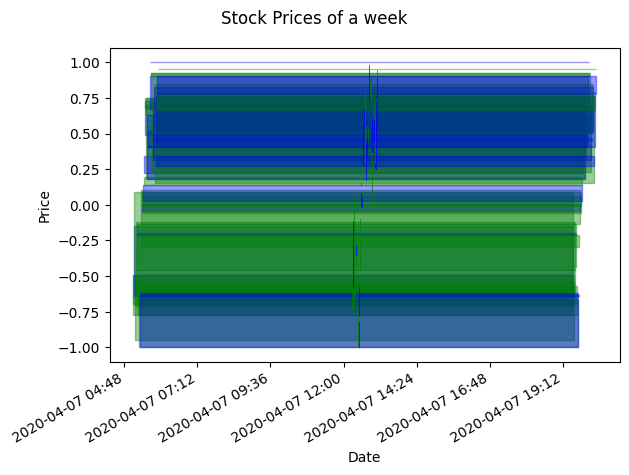

In [250]:
# Importing all the required libraries 

import matplotlib.pyplot as plt 
from mpl_finance import candlestick_ohlc 
import pandas as pd 
import matplotlib.dates as mpl_dates 
import numpy as np 
import datetime 


# Defining a dataframe showing stock prices 
# of a week 
# stock_prices = pd.DataFrame({'date': np.array([datetime.datetime(2021, 11, i+1) 
# 											for i in range(7)]), 
# 							'open': [36, 56, 45, 29, 65, 66, 67], 
# 							'close': [29, 72, 11, 4, 23, 68, 45], 
# 							'high': [42, 73, 61, 62, 73, 56, 55], 
# 							'low': [22, 11, 10, 2, 13, 24, 25]}) 
# ['OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW', 'VOLUME','ADI','TRANSACTIONS']
ohlc = df_norm.loc[:, ['DATE', 'Apple_OPEN_norm', 'Apple_HIGHT_norm', 'Apple_LOW_norm', 'Apple_CLOSE_norm']] 
ohlc['DATE'] = pd.to_datetime(ohlc['DATE']) 
ohlc['DATE'] = ohlc['DATE'].apply(mpl_dates.date2num) 
ohlc = ohlc.astype(float) 

# Creating Subplots 
fig, ax = plt.subplots() 

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='blue', 
				colordown='green', alpha=0.4) 

# Setting labels & titles 
ax.set_xlabel('Date') 
ax.set_ylabel('Price') 
fig.suptitle('Stock Prices of a week') 

# Formatting Date 
date_format = mpl_dates.DateFormatter('%Y-%m-%d %H:%M') 
# datetime_format = '%Y-%m-%d %H:%M'
ax.xaxis.set_major_formatter(date_format) 
fig.autofmt_xdate() 

fig.tight_layout() 

plt.show() 


In [251]:
ohlc

,DATE,Apple_OPEN_norm,Apple_HIGHT_norm,Apple_LOW_norm,Apple_CLOSE_norm
0,18359.511806,-0.492537,-0.729730,-0.558824,-0.69600
1,18359.512500,-0.491940,-0.729730,-0.573529,-0.77600
2,18359.513194,-0.641791,-0.117117,-0.573529,-0.15200
3,18359.513889,0.089552,0.045045,-0.647059,-0.48800
4,18359.514583,-0.492537,-0.567568,-0.735294,-0.95200
5,18359.515278,-0.537313,-0.765766,-0.750000,-0.71200
6,18359.515972,-0.447761,-0.657658,-0.500000,-0.61600
7,18359.516667,-0.119403,-0.369369,-0.426471,-0.45600
8,18359.517361,-0.208955,-0.351351,-0.279412,-0.20000
9,18359.518056,-0.134328,-0.351351,-0.279412,-0.44000
